# Assignment 1

## Objective
This assignment is to help you establish the coding capability of implementing your first ML model and the mindset of designing a proper evaluation procedure for your ML model. 

## Datasets
You are given three datasets: 
- Website Phishing
- Breast Cancer Prediction (BCP)
- Arrhythmia

For each dataset, you can find the feature names in the header. The last column "Class" stores the labels of the examples of the dataset.

## Task 0

Before starting, we need to import the relevant packages and set the random seed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Reload local python files every 2 seconds

%load_ext autoreload
%autoreload 2

In [3]:
RANDOM_STATE = 1234
np.random.seed(RANDOM_STATE)

## Task 1

We're going to load the three datasets. Since there may be missing data in the datasets, or there may be some data irrelevant to model training, the raw data need to be pre-processed. Including finding and replacing missing data, removing some data that is not useful for training the model (e.g., product number).

### 1.1 Arrhythmia

#### 1.1.1 Load dataset

In [4]:
# Load the dataset and preview the first 5 rows

data_1=pd.read_csv('arrhythmia.csv')
data_1.head()

age   sex   height   weight   QRSduration   PRinterval   Q-Tinterval  \
0   75     0      190       80            91          193           371   
1   56     1      165       64            81          174           401   
2   54     0      172       95           138          163           386   
3   55     0      175       94           100          202           380   
4   75     0      190       80            88          181           360   

    Tinterval   Pinterval   QRS  ... chV6_QwaveAmp chV6_RwaveAmp  \
0         174         121   -16  ...           0.0           9.0   
1         149          39    25  ...           0.0           8.5   
2         185         102    96  ...           0.0           9.5   
3         179         143    28  ...           0.0          12.2   
4         177         103   -16  ...           0.0          13.1   

  chV6_SwaveAmp chV6_RPwaveAmp chV6_SPwaveAmp  chV6_PwaveAmp  chV6_TwaveAmp  \
0          -0.9            0.0            0.0            0.9            2.9   
1           0.0            0.0            0.0            0.2            2.1   
2          -2.4            0.0            0.0            0.3            3.4   
3          -2.2            0.0            0.0            0.4            2.6   
4          -3.6            0.0            0.0           -0.1            3.9   

   chV6_QRSA  chV6_QRSTA  class  
0       23.3        49.4      8  
1       20.4        38.8      6  
2       12.3        49.0     10  
3       34.6        61.6      1  
4       25.4        62.8      7  

[5 rows x 280 columns]

In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to class
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


#### 1.1.2 Data pre-processing

In [6]:
data_1.replace('?', np.nan, inplace=True)

In [7]:
dict_1={}
for i in list(data_1.columns):
    for j in range(len(data_1)):
        if pd.isnull(data_1.loc[j,i])==True:
            if i in dict_1.keys():
                dict_1[i]+=1
            else:
                dict_1[i]=1
dict_1

{' T': 8, ' P': 22, ' QRST': 1, ' J': 376, ' heartrate': 1}

In [8]:
# As can be seen from the above data, since a large amount of values of feature J is missing, this feature will be droped, and other features will be filled with the mean.

data_1[' T'].fillna(data_1[' T'].median(),inplace=True)
data_1[' P'].fillna(data_1[' P'].median(),inplace=True)
data_1[' QRST'].fillna(data_1[' QRST'].median(),inplace=True)
data_1[' heartrate'].fillna(data_1[' heartrate'].median(),inplace=True)

In [9]:
data_1=data_1.drop(' J', axis=1)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 279 entries, age to class
dtypes: float64(120), int64(155), object(4)
memory usage: 985.3+ KB


In [10]:
# Convert all data types to int or float.

for i in list(data_1.columns):
    if type(data_1[i][0])==str:
        data_1[i]=data_1[i].astype('float')
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 279 entries, age to class
dtypes: float64(124), int64(155)
memory usage: 985.3 KB


In [11]:
# The pre-processing of the data set "arrhythmia" is completed

df_arrhythmia=data_1

#### 1.1.3 Summary and Explanation

In "arrhythmia" dataset, it is found that some data are missing, they appear in the dataset as "?". After statistics, it is found that a large amount of values in feature J are missing, so this feature will be droped, and the missing values in other features will be filled with the mean. Finally convert all data types to int or float.

### 1.2 BCP

#### 1.2.1 Load dataset

In [12]:
# Load the dataset and preview the first 5 rows

data_2=pd.read_csv('BCP.csv')
data_2.head()

Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            1                3                1        1      2  
1           10                3                2        1      2  
2            2                3                1        1      2  
3            4                3                7        1      2  
4            1                3                1        1      2

In [13]:
data_2.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [14]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


#### 1.2.2 Data pre-processing

In [15]:
# This dataset has no missing data, but the first column (Sample code number) is not helpful for the model training, so it needs to be droped.

df_BCP=data_2.drop('Sample code number',axis=1)
df_BCP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


#### 1.2.3 Summary and Explanation

In "BCP" dataset, the data integrity is good and no missing values are found. But the first column (Sample code number), which is not useful for training the model, so it needs to be droped.

### 1.3 Website-phishing

#### 1.3.1 Load dataset

In [16]:
# Load the dataset and preview the first 5 rows

data_3=pd.read_csv('website-phishing.csv')
data_3.head()

having_IP_Address   URL_Length   Shortining_Service   having_At_Symbol  \
0                 -1            1                    1                  1   
1                  1            1                    1                  1   
2                  1            0                    1                  1   
3                  1            0                    1                  1   
4                  1            0                   -1                  1   

    double_slash_redirecting   Prefix_Suffix   having_Sub_Domain  \
0                         -1              -1                  -1   
1                          1              -1                   0   
2                          1              -1                  -1   
3                          1              -1                  -1   
4                          1              -1                   1   

    SSLfinal_State   Domain_registeration_length   Favicon  ...  \
0               -1                            -1         1  ...   
1                1                            -1         1  ...   
2               -1                            -1         1  ...   
3               -1                             1         1  ...   
4                1                            -1         1  ...   

    popUpWidnow    Iframe   age_of_domain    DNSRecord     web_traffic   \
0              1        1               -1            -1             -1   
1              1        1               -1            -1              0   
2              1        1                1            -1              1   
3              1        1               -1            -1              1   
4             -1        1               -1            -1              0   

    Page_Rank   Google_Index   Links_pointing_to_page   Statistical_report  \
0          -1              1                        1                   -1   
1          -1              1                        1                    1   
2          -1              1                        0                   -1   
3          -1              1                       -1                    1   
4          -1              1                        1                    1   

     Class   
0        -1  
1        -1  
2        -1  
3        -1  
4         1  

[5 rows x 31 columns]

In [17]:
data_3.isnull().sum()

having_IP_Address               0
 URL_Length                     0
 Shortining_Service             0
 having_At_Symbol               0
 double_slash_redirecting       0
 Prefix_Suffix                  0
 having_Sub_Domain              0
 SSLfinal_State                 0
 Domain_registeration_length    0
 Favicon                        0
 port                           0
 HTTPS_token                    0
 Request_URL                    0
 URL_of_Anchor                  0
 Links_in_tags                  0
 SFH                            0
 Submitting_to_email            0
 Abnormal_URL                   0
 Redirect                       0
 on_mouseover                   0
 RightClick                     0
 popUpWidnow                    0
 Iframe                         0
 age_of_domain                  0
 DNSRecord                      0
 web_traffic                    0
 Page_Rank                      0
 Google_Index                   0
 Links_pointing_to_page         0
 Statistical_r

In [18]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   having_IP_Address             11055 non-null  int64
 1    URL_Length                   11055 non-null  int64
 2    Shortining_Service           11055 non-null  int64
 3    having_At_Symbol             11055 non-null  int64
 4    double_slash_redirecting     11055 non-null  int64
 5    Prefix_Suffix                11055 non-null  int64
 6    having_Sub_Domain            11055 non-null  int64
 7    SSLfinal_State               11055 non-null  int64
 8    Domain_registeration_length  11055 non-null  int64
 9    Favicon                      11055 non-null  int64
 10   port                         11055 non-null  int64
 11   HTTPS_token                  11055 non-null  int64
 12   Request_URL                  11055 non-null  int64
 13   URL_of_Anchor                1

In [19]:
# This dataset does not require pre-processing.

df_web=data_3

#### 1.3.2 Summary and Explanation

In "website-phishing" dataset, the data integrity is good and no missing values are found. At the same time, no value is found that is useless for training the model, so this dataset does not require pre-processing.

## Task 2 & Task 3

In this step, we need to implement three different decision tree models.

1. Decision stump: A decision tree with a depth of one, so we set "max_depth=1" in "DecisionTreeClassifier", and other hyperparameters are not adjusted.

2. Unpruned decision tree: That is, without adjusting any hyperparameters, let the decision tree grow freely according to the dataset.

3. Pruned decision tree: We use the pre-pruning technique, tune two hyperparameters "max_depth" and "max_leaf_nodes". We will first set a range for the two hyperparameters, and then use 10-fold cross-validation to obtain the optimal results.

### 2.1 Arrhythmia

#### 2.1.0 Split dataset

In [20]:
# Split features and class

x=df_arrhythmia.drop('class',axis=1)
y=df_arrhythmia['class']
print(x.shape, y.shape)

(452, 278) (452,)


In [21]:
# Split training data and testing data

x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = RANDOM_STATE)
print(x_train.shape, x_test.shape)

(361, 278) (91, 278)


#### 2.1.1 Decision stump

In [22]:
# Training model

tree_stump = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=RANDOM_STATE)
tree_stump.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1234)

In [23]:
# compute the accuracy of the training set and test set under this model

score = tree_stump.score(x_train, y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = tree_stump.score(x_test, y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 60.11%
Accuracy on test set: 49.45%


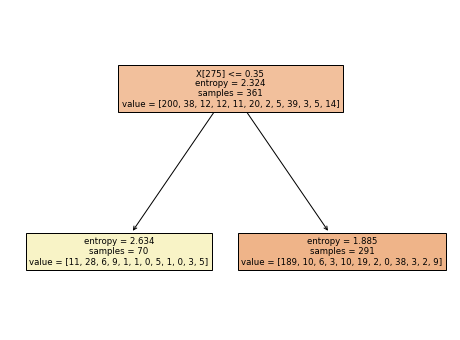

In [24]:
# Visualization

plt.figure(figsize=(8,6))
tree.plot_tree(tree_stump, filled=True)
plt.show()

#### 2.1.2 Unpruned decision tree

In [25]:
# Training model

tree_unpruned=DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE)
tree_unpruned.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [26]:
# compute the accuracy of the training set and test set under this model

score = tree_unpruned.score(x_train, y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = tree_unpruned.score(x_test, y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 100.00%
Accuracy on test set: 59.34%


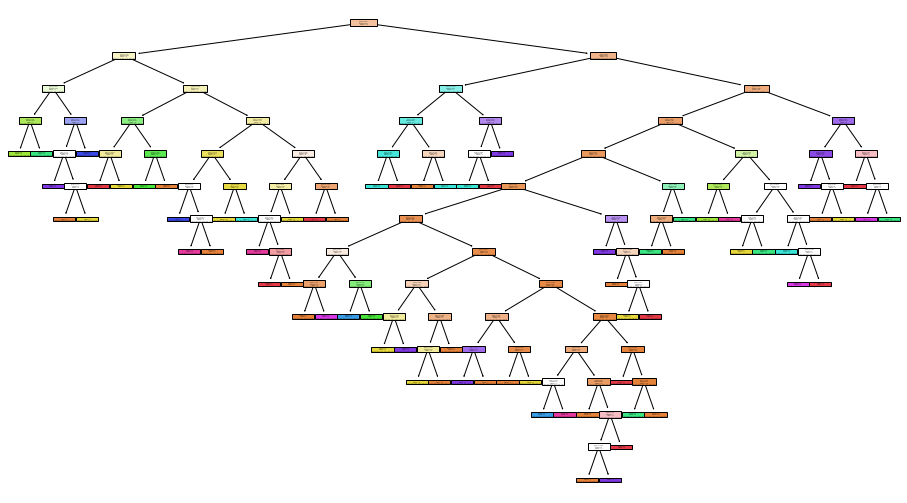

In [27]:
# Visualization

plt.figure(figsize=(16,9))
tree.plot_tree(tree_unpruned, filled=True)
plt.show()

#### 2.1.3 Pruned decision tree

In [28]:
# Obtain optimal hyperparameters through cross-validation

dtree=DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE)
param_dist = {'max_leaf_nodes':range(50), 'max_depth':range(20)}
search = RandomizedSearchCV(dtree, param_dist, cv=10, n_jobs=-1, random_state=RANDOM_STATE)
search.fit(x_train, y_train)
best_classifier = search.best_params_
print(best_classifier)

C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


{'max_leaf_nodes': 14, 'max_depth': 13}


In [29]:
# Training model

tree_pruned=DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=14, max_depth=13, random_state=RANDOM_STATE)
tree_pruned.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=13, max_leaf_nodes=14,
                       random_state=1234)

In [30]:
# compute the accuracy of the training set and test set under this model

score = tree_pruned.score(x_train, y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = tree_pruned.score(x_test, y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 78.39%
Accuracy on test set: 64.84%


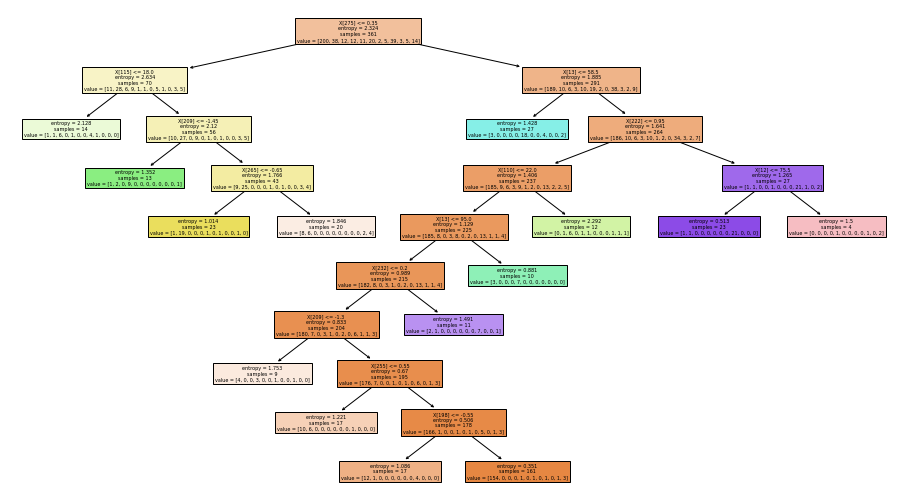

In [31]:
# Visualization

plt.figure(figsize=(16,9))
tree.plot_tree(tree_pruned, filled=True)
plt.show()

#### 2.1.4 Summary and Explanation

The above are the results on the dataset "Arrhythmia" under three different training models.

1. Before training, the pre-processed dataset is split into features and class, and then the entire dataset is split into the training set and testing set, the testing set accounts for 20%.

2. Usually, the decision stump classifies the data very roughly, so both the training accuracy and the testing accuracy are very poor in this dataset.

3. If the decision tree is without any pruning, the model becomes very complex. It can classify the training set accurately, but it means the model is overfitted. As can be seen from the above data, the model does not perform well on the testing set.

4. During the implementation of pre-pruning, we received a warning, which was caused by not enough samples in the dataset.

5. After cross-validation, we obtained the optimal hyperparameters. As can be seen from the above data, the test accuracy of this model is the best. But overall, this accuracy is still unsatisfactory, and if the number of samples in the dataset can be increased, or more hyperparameters can be adjusted, the accuracy will be further improved.

### 2.2 BCP

#### 2.2.0 Split dataset

In [32]:
# Split features and class

x=df_BCP.drop('Class',axis=1)
y=df_BCP['Class']
print(x.shape, y.shape)

(683, 9) (683,)


In [33]:
# Split training data and testing data

x_train, x_test ,y_train, y_test = train_test_split(x, y,test_size=0.2, random_state = RANDOM_STATE)
print(x_train.shape, x_test.shape)

(546, 9) (137, 9)


#### 2.2.1 Decision stump

In [34]:
# Training model

tree_stump = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=RANDOM_STATE)
tree_stump.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1234)

In [35]:
# compute the accuracy of the training set and test set under this model

score = tree_stump.score(x_train, y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = tree_stump.score(x_test, y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 93.04%
Accuracy on test set: 91.24%


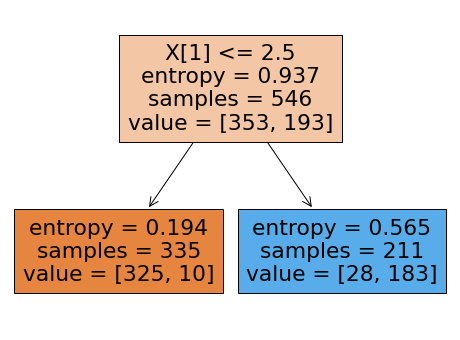

In [36]:
# Visualization

plt.figure(figsize=(8,6))
tree.plot_tree(tree_stump, filled=True)
plt.show()

#### 2.2.2 Unpruned decision tree

In [37]:
# Training model

tree_unpruned=DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE)
tree_unpruned.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [38]:
# compute the accuracy of the training set and test set under this model

score = tree_unpruned.score(x_train, y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = tree_unpruned.score(x_test, y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 100.00%
Accuracy on test set: 95.62%


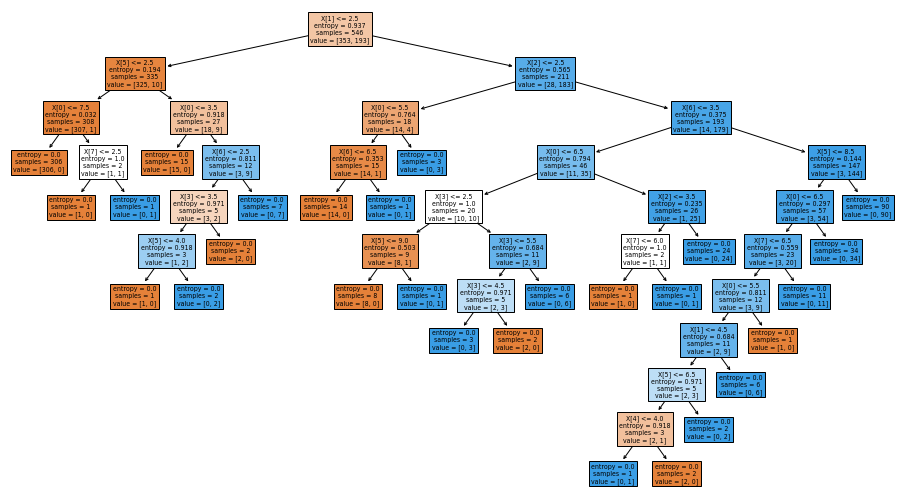

In [39]:
# Visualization

plt.figure(figsize=(16,9))
tree.plot_tree(tree_unpruned, filled=True)
plt.show()

#### 2.2.3 Pruned decision tree

In [40]:
# Obtain optimal hyperparameters through cross-validation

dtree=DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE)
param_dist = {'max_leaf_nodes':range(50), 'max_depth':range(20)}
search = RandomizedSearchCV(dtree, param_dist, cv=10, n_jobs=-1, random_state=RANDOM_STATE)
search.fit(x_train, y_train)
best_classifier = search.best_params_
print(best_classifier)

{'max_leaf_nodes': 23, 'max_depth': 14}


In [41]:
# Training model

tree_pruned=DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=23, max_depth=14, random_state=RANDOM_STATE)
tree_pruned.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=14, max_leaf_nodes=23,
                       random_state=1234)

In [42]:
# compute the accuracy of the training set and test set under this model

score = tree_pruned.score(x_train, y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = tree_pruned.score(x_test, y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 99.27%
Accuracy on test set: 95.62%


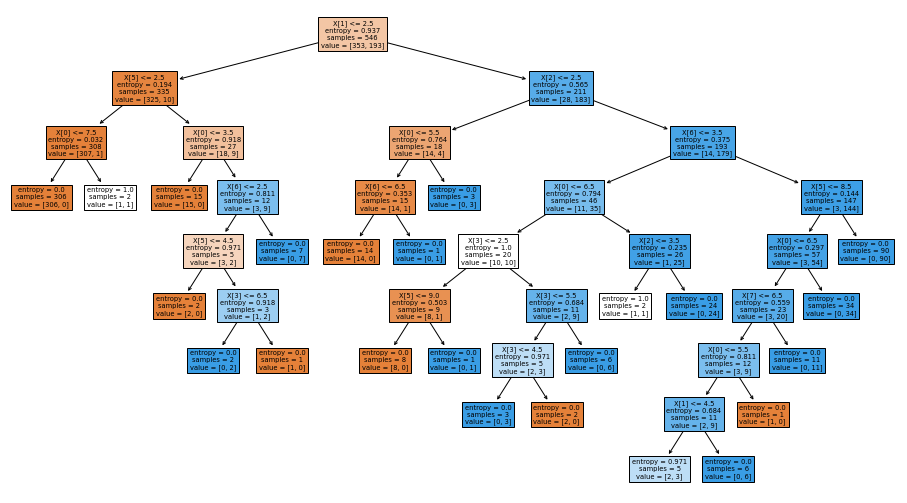

In [43]:
# Visualization

plt.figure(figsize=(16,9))
tree.plot_tree(tree_pruned, filled=True)
plt.show()

#### 2.2.4 Summary and Explanation

The above are the results of the dataset "BCP" under three different training models.

1. Before training, the pre-processed dataset is split into features and class, and then the entire dataset is split into the training set and testing set, the testing set accounts for 20%.

2. Usually the decision stump classifies the data very roughly, but for this dataset, the model performed well. The reasons are as follows:
        1). The dataset has few features;
        2). There are only two results ("2" and "4") in the class;
   These two reasons make it possible to obtain high accuracy without a very complex model. This shows that a complex model is not always better, it should be adjusted according to the actual data.

3. The unpruned decision tree can achieve 100% training accuracy (overfitting), but the testing accuracy will drop.

4. After cross-validation, we obtained the optimal hyperparameters. As can be seen from the above data, the performance of this pruned decision tree is excellent.

### 2.3 Website-phishing

#### 2.3.0 Split dataset

In [44]:
# Split features and class

x=df_web.drop('  Class ',axis=1)
y=df_web['  Class ']
print(x.shape, y.shape)

(11055, 30) (11055,)


In [45]:
# Split training data and testing data

x_train, x_test ,y_train, y_test = train_test_split(x, y,test_size=0.2, random_state = RANDOM_STATE)
print(x_train.shape, x_test.shape)

(8844, 30) (2211, 30)


#### 2.3.1 Decision stump

In [46]:
# Training model

tree_stump = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=RANDOM_STATE)
tree_stump.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1234)

In [47]:
# compute the accuracy of the training set and test set under this model

score = tree_stump.score(x_train, y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = tree_stump.score(x_test, y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 88.96%
Accuracy on test set: 88.60%


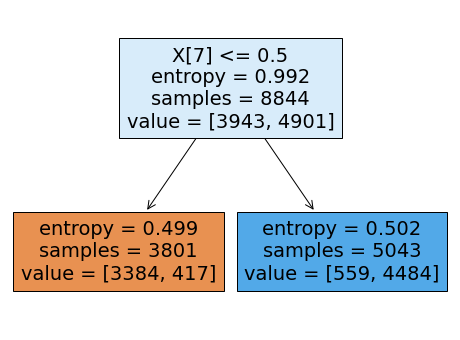

In [48]:
# Visualization

plt.figure(figsize=(8,6))
tree.plot_tree(tree_stump, filled=True)
plt.show()

#### 2.3.2 Unpruned decision tree

In [49]:
# Training model

tree_unpruned=DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE)
tree_unpruned.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [50]:
# compute the accuracy of the training set and test set under this model

score = tree_unpruned.score(x_train, y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = tree_unpruned.score(x_test, y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 98.97%
Accuracy on test set: 96.65%


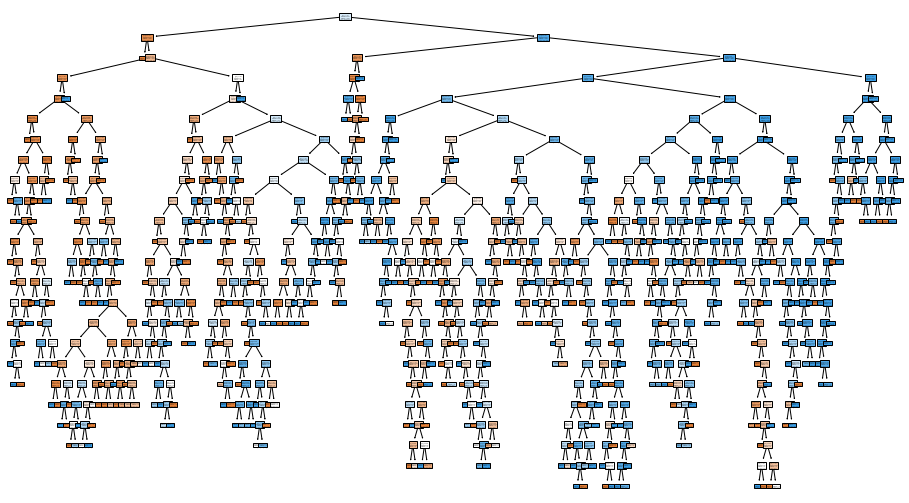

In [51]:
# Visualization

plt.figure(figsize=(16,9))
tree.plot_tree(tree_unpruned, filled=True)
plt.show()

#### 2.3.3 Pruned decision tree

In [52]:
# Obtain optimal hyperparameters through cross-validation

dtree=DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE)
param_dist = {'max_leaf_nodes':range(50), 'max_depth':range(20)}
search = RandomizedSearchCV(dtree, param_dist, cv=10, n_jobs=-1, random_state=RANDOM_STATE)
search.fit(x_train, y_train)
best_classifier = search.best_params_
print(best_classifier)

{'max_leaf_nodes': 39, 'max_depth': 13}


In [53]:
# Training model

tree_pruned=DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=39, max_depth=13, random_state=RANDOM_STATE)
tree_pruned.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=13, max_leaf_nodes=39,
                       random_state=1234)

In [54]:
# compute the accuracy of the training set and test set under this model

score = tree_pruned.score(x_train, y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = tree_pruned.score(x_test, y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 94.15%
Accuracy on test set: 92.85%


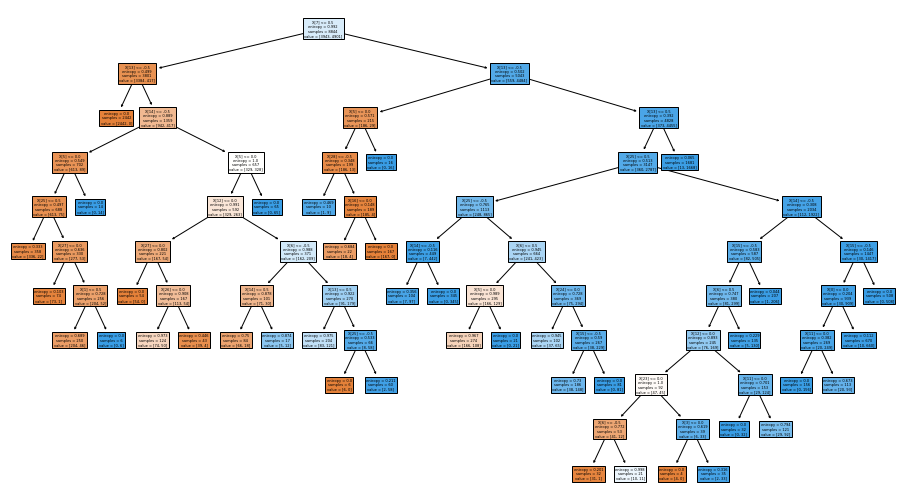

In [55]:
# Visualization

plt.figure(figsize=(16,9))
tree.plot_tree(tree_pruned, filled=True)
plt.show()

#### 2.3.4 Summary and Explanation

The above are the results on the dataset "Website-phishing" under three different training models.

1. Before training, the pre-processed dataset is split into features and class, and then the entire dataset is split into the training set and testing set, the testing set accounts for 20%.

2. The performance of the decision stump is the worst of the three models, although it has a test accuracy of 88%.

3. The unpruned decision tree model performs best in this dataset, but from the above data, it can be seen that the unpruned model is very complex, and if the number of testing sets is increased, the accuracy will drop.

4. After cross-validation, we obtained the optimal hyperparameters, but the testing accuracy of the pre-pruning tree is not the best. We can further improve the accuracy by adjusting more hyperparameters.

## Task 4

In this step, we will compute the p-value based on the t-value, and use it to compare the differences between the three models. If p-value < 0.05, it means that the difference between M1 & M2 is statistically significant. First, we create three empty arrays to store the scores of the three decision tree models. Then set up 10-fold cross-validation and use the loop to test and compare three models multiple times. Finally calculate the results with "ttest_rel".

### 4.1 Arrhythmia

In [56]:
x=df_arrhythmia.drop('class',axis=1)
y=df_arrhythmia['class']

pred_stump=[]
pred_unpruned=[]
pred_pruned=[]

kf = KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True)
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    tree_stump = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=RANDOM_STATE)
    tree_stump.fit(x_train, y_train)
    tree_unpruned=DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE)
    tree_unpruned.fit(x_train, y_train)
    tree_pruned=DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=14, max_depth=13, random_state=RANDOM_STATE)
    tree_pruned.fit(x_train, y_train)
    
    pred_stump+=tree_stump.predict(x_test).tolist()
    pred_unpruned+=tree_unpruned.predict(x_test).tolist()
    pred_pruned+=tree_pruned.predict(x_test).tolist()

print('stump vs unpruned:')
print(ttest_rel(pred_stump,pred_unpruned))
print('\n')
print('stump vs pruned')
print(ttest_rel(pred_stump,pred_pruned))
print('\n')
print('unpruned vs pruned')
print(ttest_rel(pred_unpruned,pred_pruned))

stump vs unpruned:
Ttest_relResult(statistic=-12.237863327014036, pvalue=6.198492061388586e-30)


stump vs pruned
Ttest_relResult(statistic=-11.293878680824024, pvalue=3.223022221654747e-26)


unpruned vs pruned
Ttest_relResult(statistic=4.681306225155514, pvalue=3.7761949019626317e-06)


From the above results, it can be seen that for the dataset "Arrhythmia", the decision stump performs the worst. The p-values between the three models are all far less than 0.05, so they are statistically significant.

### 4.2 BCP

In [57]:
x=df_BCP.drop('Class',axis=1)
y=df_BCP['Class']

pred_stump=[]
pred_unpruned=[]
pred_pruned=[]

kf = KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True)
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    tree_stump = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=RANDOM_STATE)
    tree_stump.fit(x_train, y_train)
    tree_unpruned=DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE)
    tree_unpruned.fit(x_train, y_train)
    tree_pruned=DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=23, max_depth=14, random_state=RANDOM_STATE)
    tree_pruned.fit(x_train, y_train)
    
    pred_stump+=tree_stump.predict(x_test).tolist()
    pred_unpruned+=tree_unpruned.predict(x_test).tolist()
    pred_pruned+=tree_pruned.predict(x_test).tolist()

print('stump vs unpruned:')
print(ttest_rel(pred_stump,pred_unpruned))
print('\n')
print('stump vs pruned')
print(ttest_rel(pred_stump,pred_pruned))
print('\n')
print('unpruned vs pruned')
print(ttest_rel(pred_unpruned,pred_pruned))

stump vs unpruned:
Ttest_relResult(statistic=4.789400087985136, pvalue=2.053264269206721e-06)


stump vs pruned
Ttest_relResult(statistic=5.5476992026382455, pvalue=4.144241981182341e-08)


unpruned vs pruned
Ttest_relResult(statistic=2.143710285501735, pvalue=0.03240909158483473)


From the above results, it can be seen that for the dataset "BCP", the performance difference of the three models is not too much, pre-pruning technology does not bring much performance improvement here. relatively speaking, the performance of the decision stump is slightly worse. The p-values between the three models are all less than 0.05, so they are statistically significant.

### 4.3 Website-phishing

In [58]:
x=df_web.drop('  Class ',axis=1)
y=df_web['  Class ']

pred_stump=[]
pred_unpruned=[]
pred_pruned=[]

kf = KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True)
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    tree_stump = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=RANDOM_STATE)
    tree_stump.fit(x_train, y_train)
    tree_unpruned=DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE)
    tree_unpruned.fit(x_train, y_train)
    tree_pruned=DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=39, max_depth=13, random_state=RANDOM_STATE)
    tree_pruned.fit(x_train, y_train)
    
    pred_stump+=tree_stump.predict(x_test).tolist()
    pred_unpruned+=tree_unpruned.predict(x_test).tolist()
    pred_pruned+=tree_pruned.predict(x_test).tolist()

print('stump vs unpruned:')
print(ttest_rel(pred_stump,pred_unpruned))
print('\n')
print('stump vs pruned')
print(ttest_rel(pred_stump,pred_pruned))
print('\n')
print('unpruned vs pruned')
print(ttest_rel(pred_unpruned,pred_pruned))

stump vs unpruned:
Ttest_relResult(statistic=3.6335408703902843, pvalue=0.00028082519031406877)


stump vs pruned
Ttest_relResult(statistic=8.538128201488101, pvalue=1.5425731783866662e-17)


unpruned vs pruned
Ttest_relResult(statistic=5.5575843794832736, pvalue=2.798735403910034e-08)


From the above results, it can be seen that for the dataset "Website-phishing", the performance difference of the three models is not too much, pre-pruning technology does not bring much performance improvement here. Relatively speaking, the performance of the decision stump is slightly worse. The p-values between the three models are all less than 0.05, so they are statistically significant.

## Task 5

In this step, we will use the post-pruning technique to optimize the decision tree model, so we should build an unpruned decision tree first. There are various methods for post-pruning technology, including REP, PEP, and CCP. This time, we use the CCP method.

There is an important parameter "ccp_alpha" in the CCP method, the value of "ccp_alpha" determines the number of nodes (subtrees) be pruned.

We use "cost_complexity_pruning_path" to find all the values of "ccp_alpha", and then we can obtain the different pruned decision trees according to different "ccp_alpha" values, so the corresponding training accuracy and testing accuracy can be further obtained. By plotting the relationship between the accuracy and the "ccp_alpha" value, we can intuitively see the optimal value of "ccp_alpha".

### 5.1 Arrhythmia

#### 5.1.0 Split dataset

In [59]:
# Split features and class
x=df_arrhythmia.drop('class',axis=1)
y=df_arrhythmia['class']

# Split training data and testing data
x_train, x_test ,y_train, y_test = train_test_split(x, y,test_size=0.2, random_state = RANDOM_STATE)

#### 5.1.1 Get ccp_alpha values

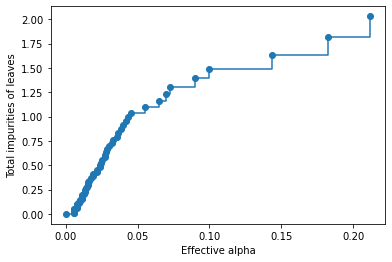

In [60]:
# Training a unpruned decision tree
clf=DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE)
clf.fit(x_train, y_train)

# Ccp_alpha values
path=clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas, impurities=path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurities of leaves")
plt.show()

In [61]:
# Training models with different ccp_alpha values
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29384900029609407


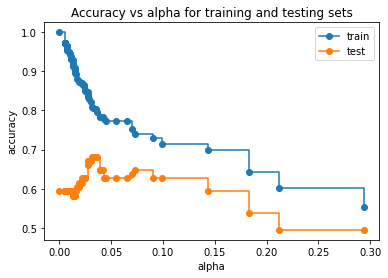

In [62]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

#### 5.1.2 Post-pruning decision tree

In [63]:
# Training model

post_pruned=DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE, ccp_alpha=0.035)
post_pruned.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.035, criterion='entropy', random_state=1234)

In [64]:
# compute the accuracy of the training set and test set under this model

score = post_pruned.score(x_train, y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = post_pruned.score(x_test, y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 80.61%
Accuracy on test set: 68.13%


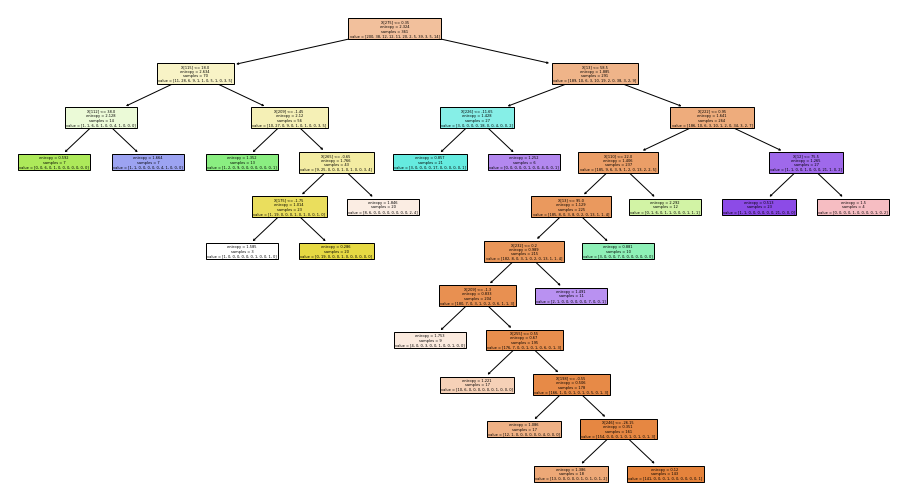

In [65]:
# Visualization

plt.figure(figsize=(16,9))
tree.plot_tree(post_pruned, filled=True)
plt.show()

#### 5.1.3 Summary and Explanation

The above is the result of the dataset "Arrhythmia" under the post-pruning decision tree.

1. As the alpha value increases, the more nodes (subtrees) are pruned, the largest valid alpha value means that the tree has only one node.

2. When the alpha is 0, we can see that the training accuracy is the highest, which also means that the model is overfitting. As the alpha value increases, the variance between test accuracy and training accuracy decreases.

3. When the alpha value is about 0.035, the test accuracy rate is the highest. We use this value to train the model, and the accuracy rate obtained is about 68%.

4. For dataset "Arrhythmia", the post-pruning model performs better than the three models in task 2. Of course, if the pre-pruning and post-pruning techniques can be combined, the accuracy can be further improved.

### 5.2 BCP

#### 5.2.0 Split dataset

In [66]:
# Split features and class
x=df_BCP.drop('Class',axis=1)
y=df_BCP['Class']

# Split training data and testing data
x_train, x_test ,y_train, y_test = train_test_split(x, y,test_size=0.2, random_state = RANDOM_STATE)

#### 5.2.1 Get ccp_alpha values

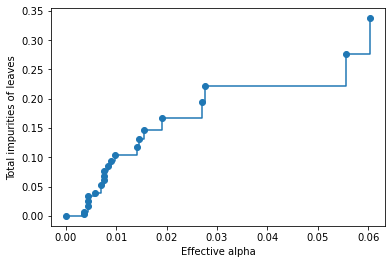

In [67]:
# Training a unpruned decision tree
clf=DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE)
clf.fit(x_train, y_train)

# Ccp_alpha values
path=clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas, impurities=path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurities of leaves")
plt.show()

In [68]:
# Training models with different ccp_alpha values
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.600061953886527


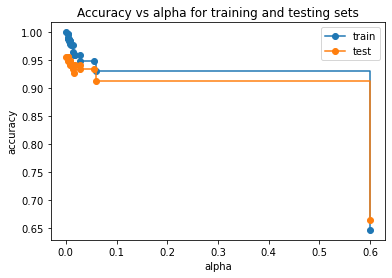

In [69]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

#### 5.2.2 Post-pruning decision tree

In [70]:
# Training model

post_pruned=DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE, ccp_alpha=0.08)
post_pruned.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.08, criterion='entropy', random_state=1234)

In [71]:
# compute the accuracy of the training set and test set under this model

score = post_pruned.score(x_train, y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = post_pruned.score(x_test, y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 93.04%
Accuracy on test set: 91.24%


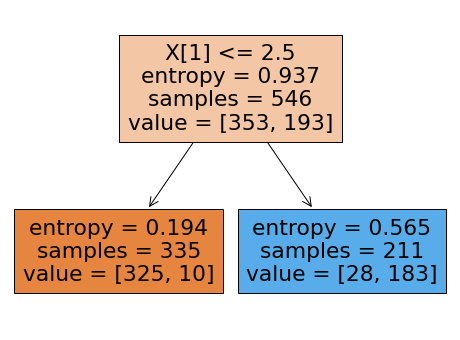

In [72]:
# Visualization

plt.figure(figsize=(8,6))
tree.plot_tree(post_pruned, filled=True)
plt.show()

#### 5.2.3 Summary and Explanation

The above is the result of the dataset "BCP" under the post-pruning decision tree.

1. As the alpha value increases, the more nodes (subtrees) are pruned, the largest valid alpha value means that the tree has only one node.

2. When Alpha approaches 0, the training accuracy and test accuracy are very high, and their variance is also small.

3. Even as the alpha increases, the training accuracy and the test accuracy remain at a high level until when the alpha is maximum, there is only one node left in the tree, which leads to the accuracy drop sharply. It also explains the reason why the accuracy of three different decision tree models in task 2 is similar.

4. For the dataset "BCP", the testing accuracy of the pre-pruned decision tree is slightly higher than that of the post-pruned decision tree, but the difference is not significant.

### 5.3 Website-phishing

#### 5.3.0 Split dataset

In [73]:
# Split features and class
x=df_web.drop('  Class ',axis=1)
y=df_web['  Class ']

# Split training data and testing data
x_train, x_test ,y_train, y_test = train_test_split(x, y,test_size=0.2, random_state = RANDOM_STATE)

#### 5.3.1 Get ccp_alpha values

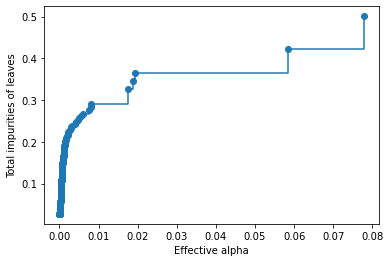

In [74]:
# Training a unpruned decision tree
clf=DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE)
clf.fit(x_train, y_train)

# Ccp_alpha values
path=clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas, impurities=path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurities of leaves")
plt.show()

In [75]:
# Training models with different ccp_alpha values
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.49052890157038254


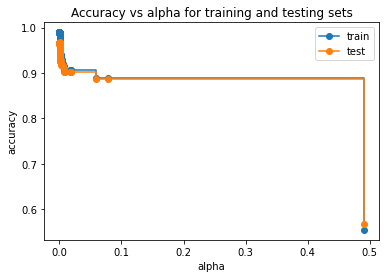

In [76]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

#### 5.3.2 Post-pruning decision tree

In [77]:
# Training model

post_pruned=DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE, ccp_alpha=0.02)
post_pruned.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.02, criterion='entropy', random_state=1234)

In [78]:
# compute the accuracy of the training set and test set under this model

score = post_pruned.score(x_train, y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = post_pruned.score(x_test, y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 90.74%
Accuracy on test set: 90.19%


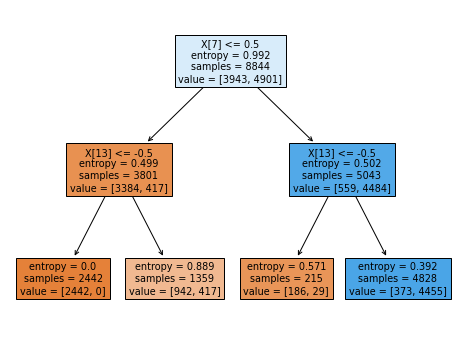

In [79]:
# Visualization

plt.figure(figsize=(8,6))
tree.plot_tree(post_pruned, filled=True)
plt.show()

#### 5.3.3 Summary and Explanation

The above is the result of the dataset "Website-phishing" under the post-pruning decision tree.

1. As the alpha value increases, the more nodes (subtrees) are pruned, the largest valid alpha value means that the tree has only one node.

2. When alpha approaches 0, both training data and test data have high accuracy, and as alpha increases, their accuracy decreases slightly.

3. The variance of the training set and test set is very small.

4. Compared with the pre-pruning model in task 2, the accuracy of the post-pruning model decreases slightly, but the pre-pruning model is much more complicated than the post-pruning model.
